# Desafío Clase 34 - Análisis Univariado

En este desafío, haré un análisis univariado del dataset presentado en el desafío *Definición de la Fuente de Información*, recopilando información sobre las ventas en la cadena de retail ecuatoriana La Favorita (extraído de la siguiente competición de Kaggle: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=train.csv)

En el análisis, se dará respuesta a las siguientes preguntas acerca de la información contenida en el dataset:
* ¿Cuántas sucursales se relevaron? ¿Cómo se encuentran distribuidas geográficamente?
* ¿De qué manera se distribuyen los datos de ventas entre las sucursales relevadas? ¿Y por rubro?
* ¿Cuántas transacciones se registran por sucursal? ¿Hay intervalos de tiempo en los que pueda considerarse que faltan datos?
* ¿Cómo se comporta el precio del crudo durante el período relevado?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ¿Cuántas sucursales se relevaron?

In [2]:
sucursales = pd.read_csv('E:\DESCARGAS\Archivo_de_apuntes_recursos_Coder_(no_borrar)\Data Science_Proyecto Final\store-sales-time-series-forecasting\stores.csv')

In [3]:
sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [4]:
sucursales.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
len(pd.unique(sucursales['store_nbr']))

54

**Hay en total 54 sucursales.**

## ¿Cómo se distribuyen geográficamente las sucursales relevadas?

In [6]:
pd.value_counts(sucursales['city'])

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [7]:
ciudades = pd.value_counts(sucursales['city'])

In [8]:
ciudades = pd.DataFrame(ciudades)

In [9]:
ciudades.head()

,city
Quito,18
Guayaquil,8
Cuenca,3
Santo Domingo,3
Manta,2


In [10]:
sns.set(rc = {'figure.figsize':(10,6)})

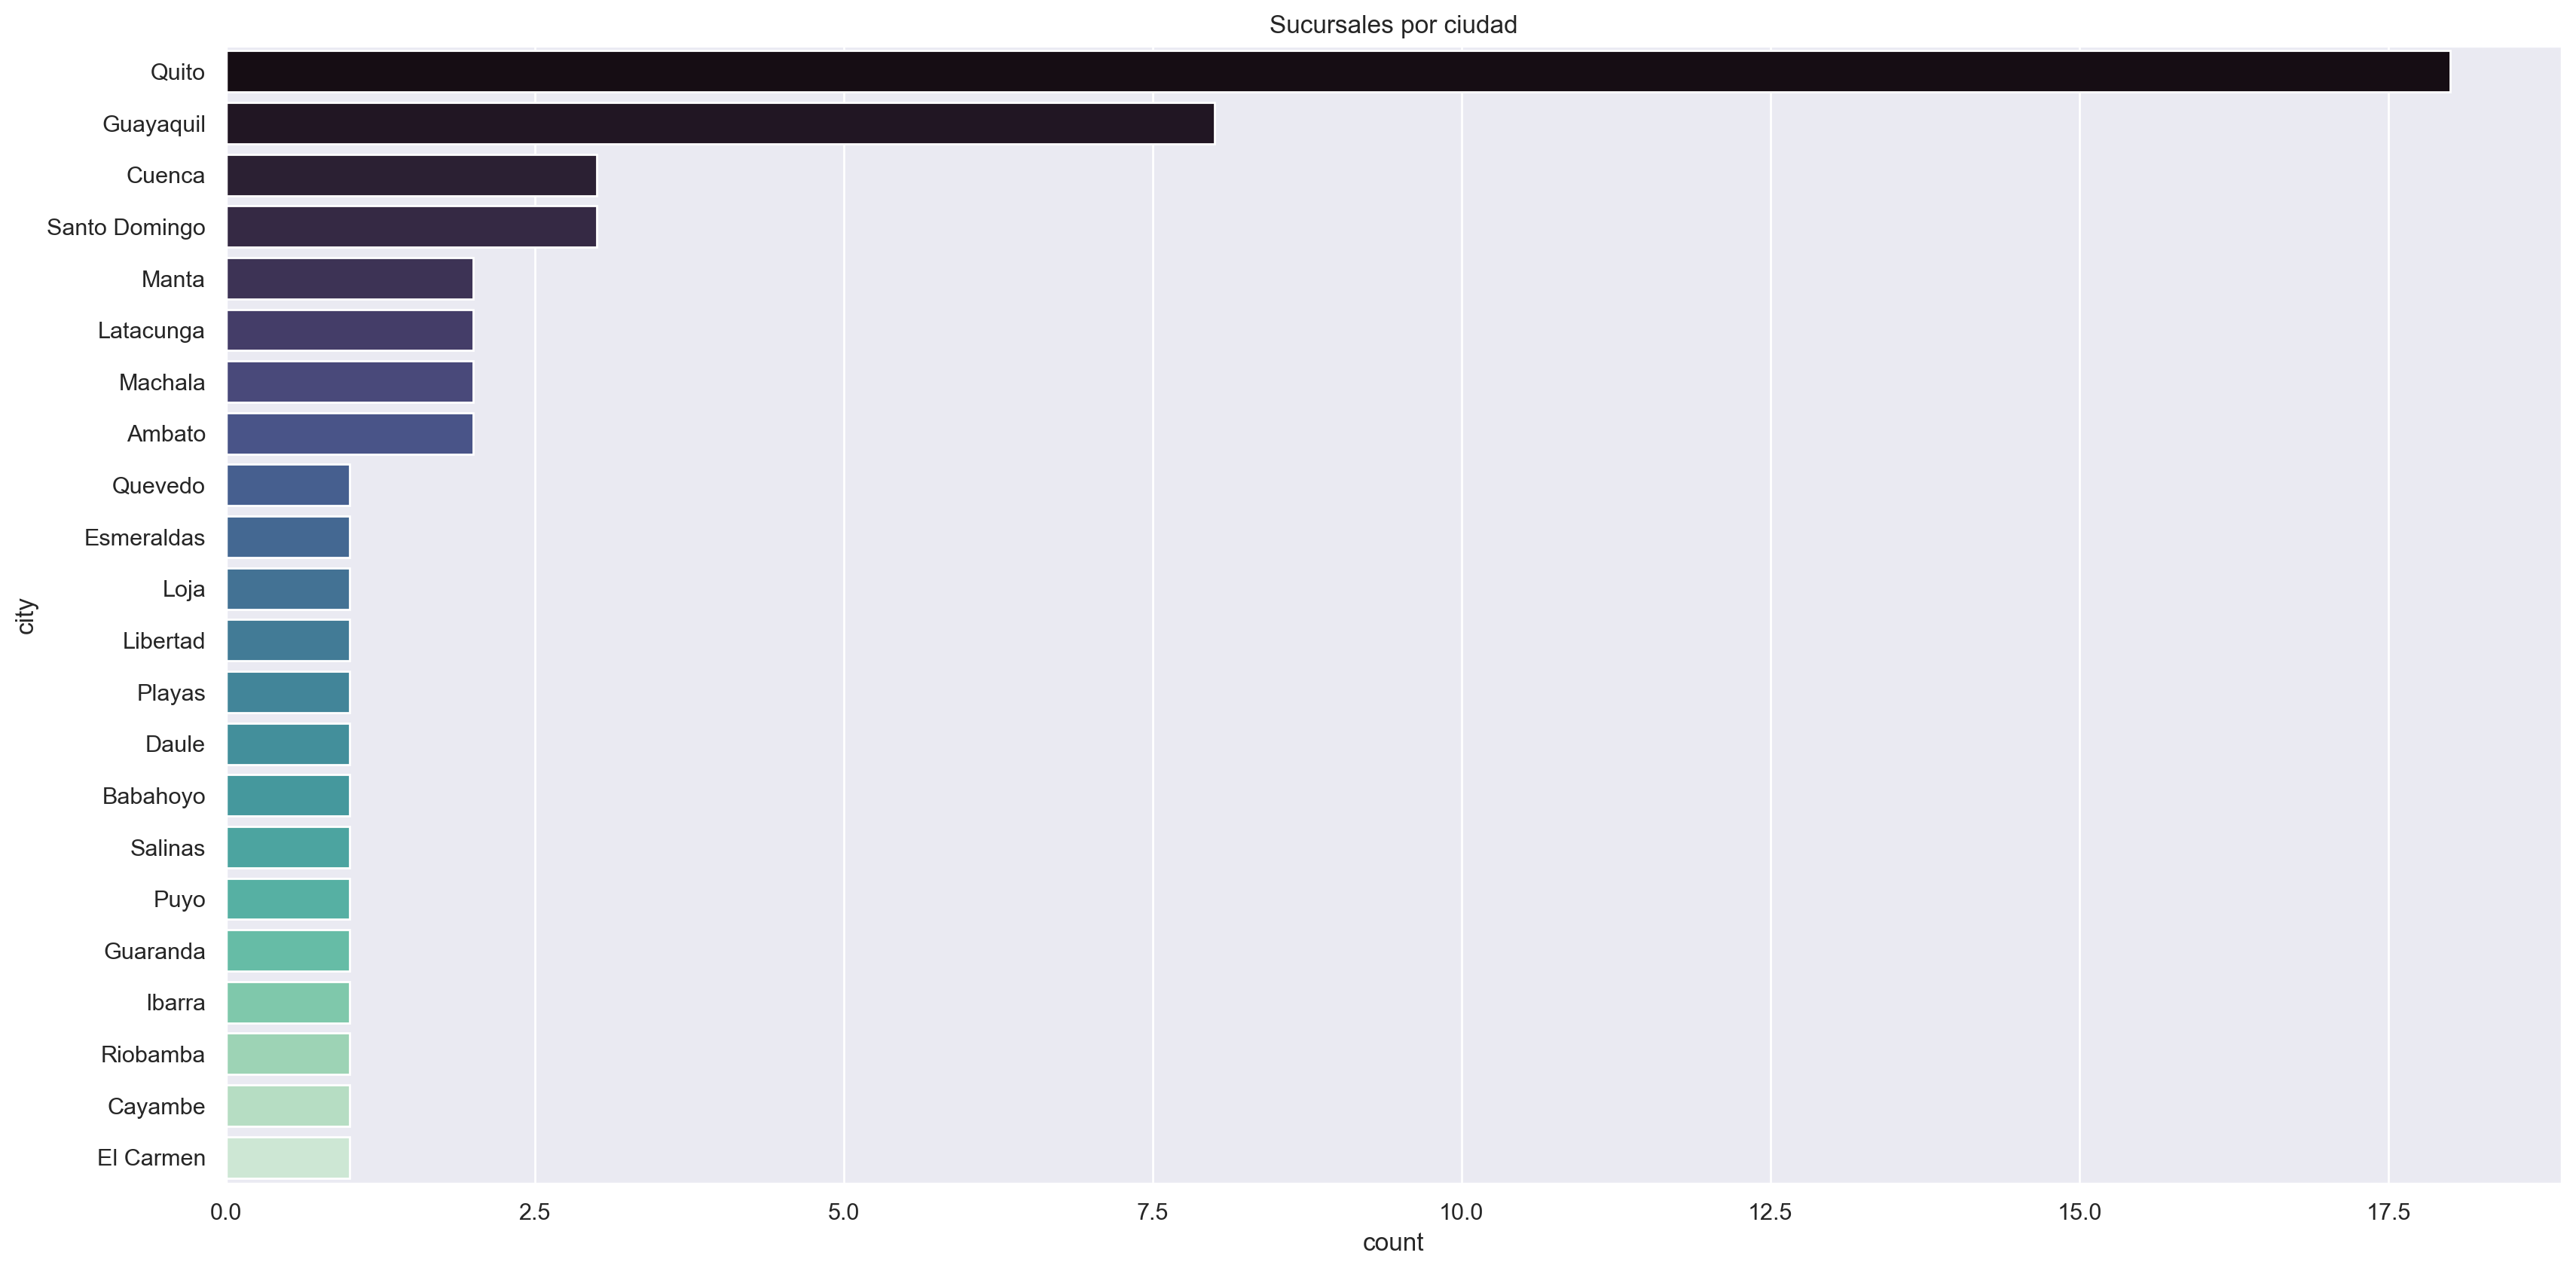

In [39]:
suc_por_ciudad = sns.countplot(
    y=sucursales.city, 
    palette='mako', 
    order = sucursales['city'].value_counts().index).set(title='Sucursales por ciudad')

**Se observa que las sucursales se concentran en la ciudad de Quito y, en menor medida, en Guayaquil. Resulta algo esperable al ser las principales ciudades del país en población.**

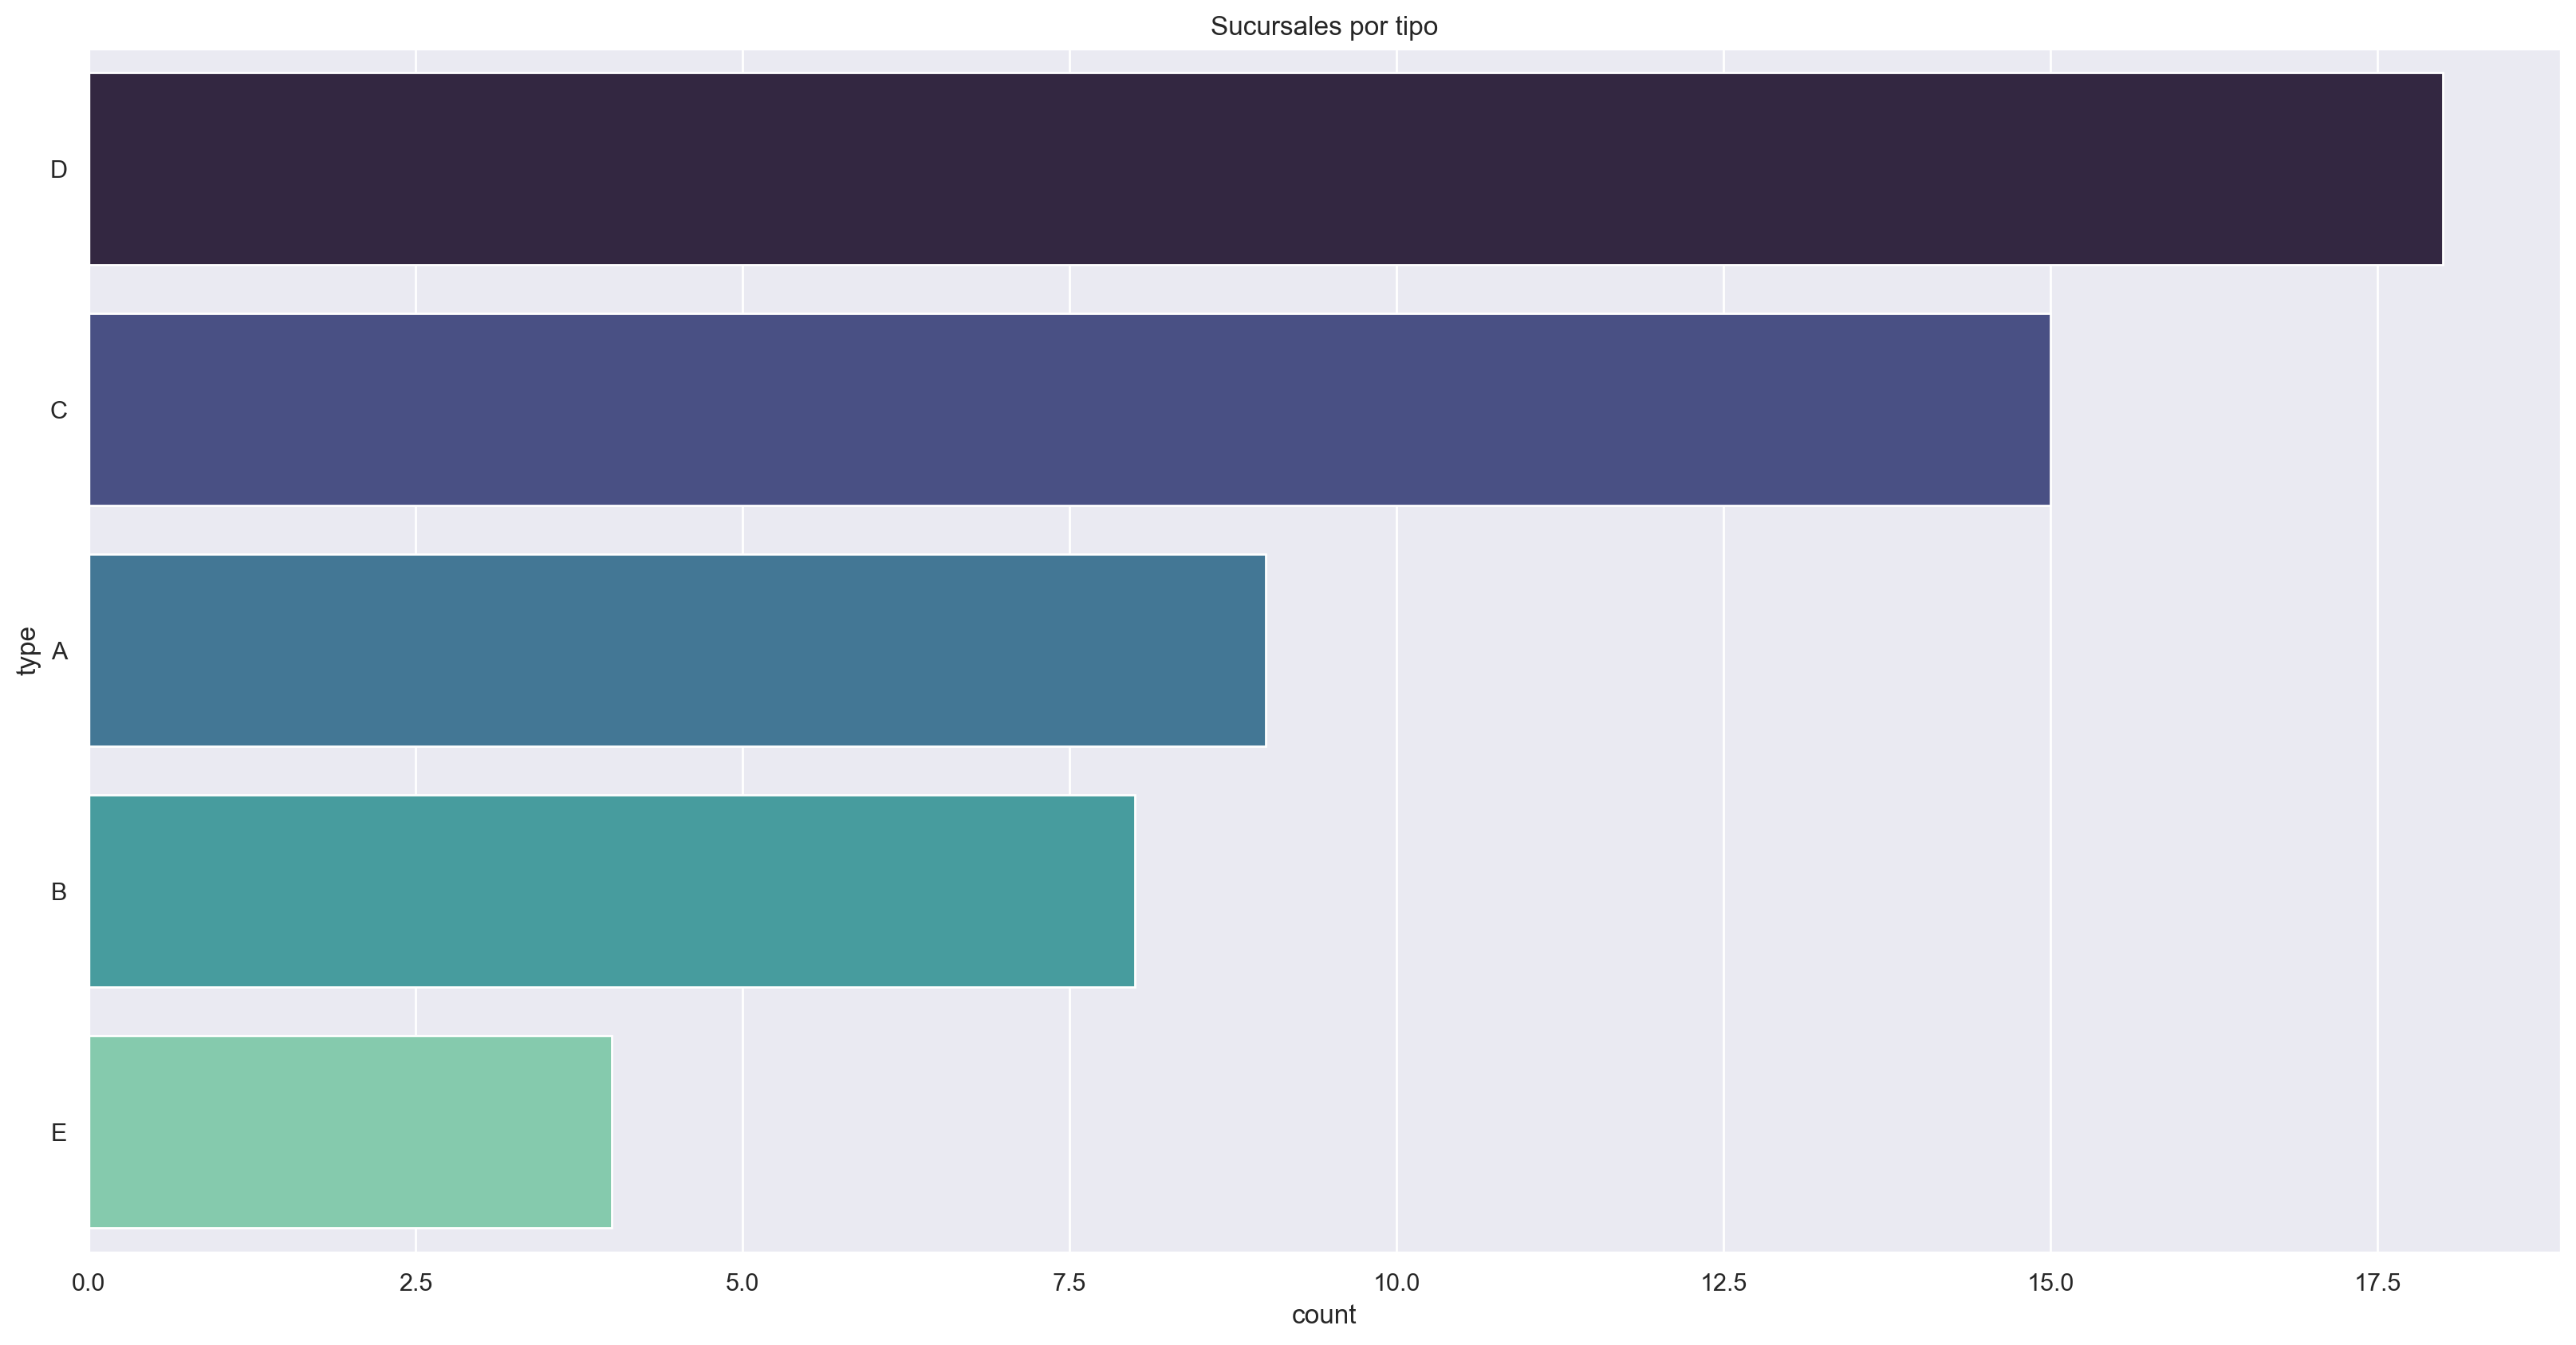

In [38]:
suc_por_tipo = sns.countplot(
    y=sucursales.type,
    palette='mako', 
    order = sucursales['type'].value_counts().index).set(title='Sucursales por tipo')

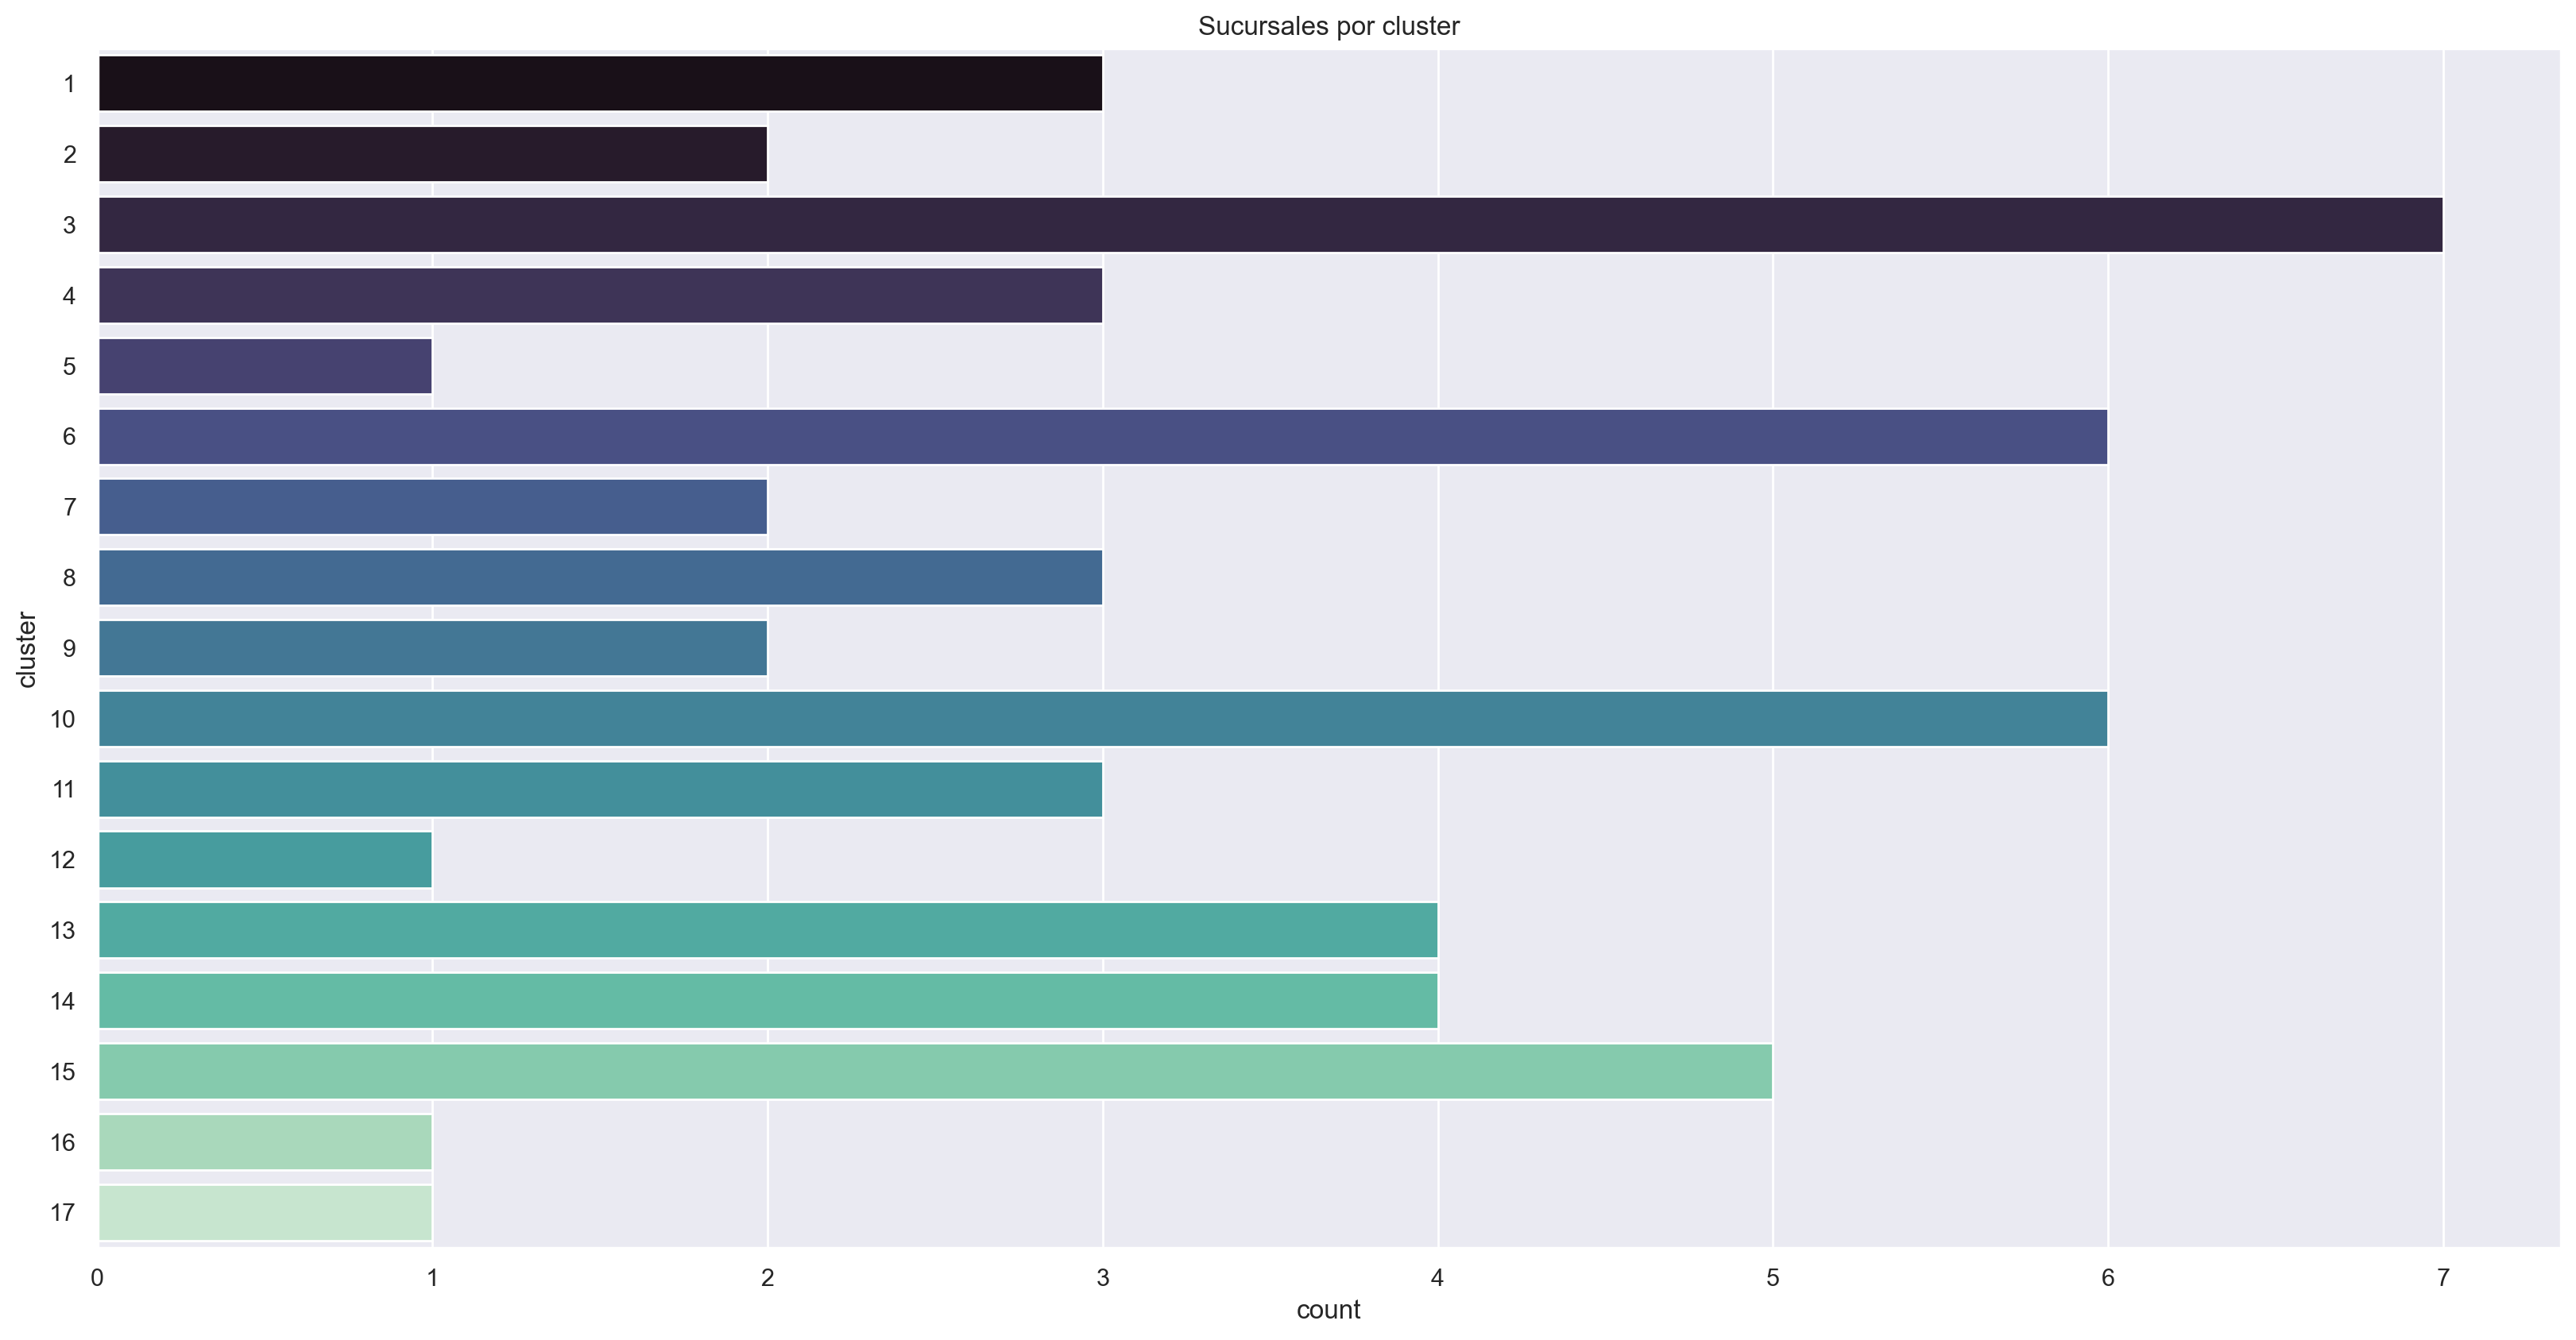

In [37]:
suc_por_tipo = sns.countplot(
    y=sucursales.cluster,
    palette='mako').set(title='Sucursales por cluster')

Grafiqué también el recuento de sucursales por tipo y por cluster. Es posible que alguna de estas dos variables pueda ser relevante a la hora de hacer análisis bivariado/multivariado.

## ¿De qué manera se distribuyen los datos de ventas entre las sucursales relevadas? ¿Y por rubro?

Analicemos ahora el dataframe con más datos entre la información del dataset.

In [14]:
train = pd.read_csv('E:/DESCARGAS/Archivo_de_apuntes_recursos_Coder_(no_borrar)/Data Science_Proyecto Final/store-sales-time-series-forecasting/train.csv')

In [15]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


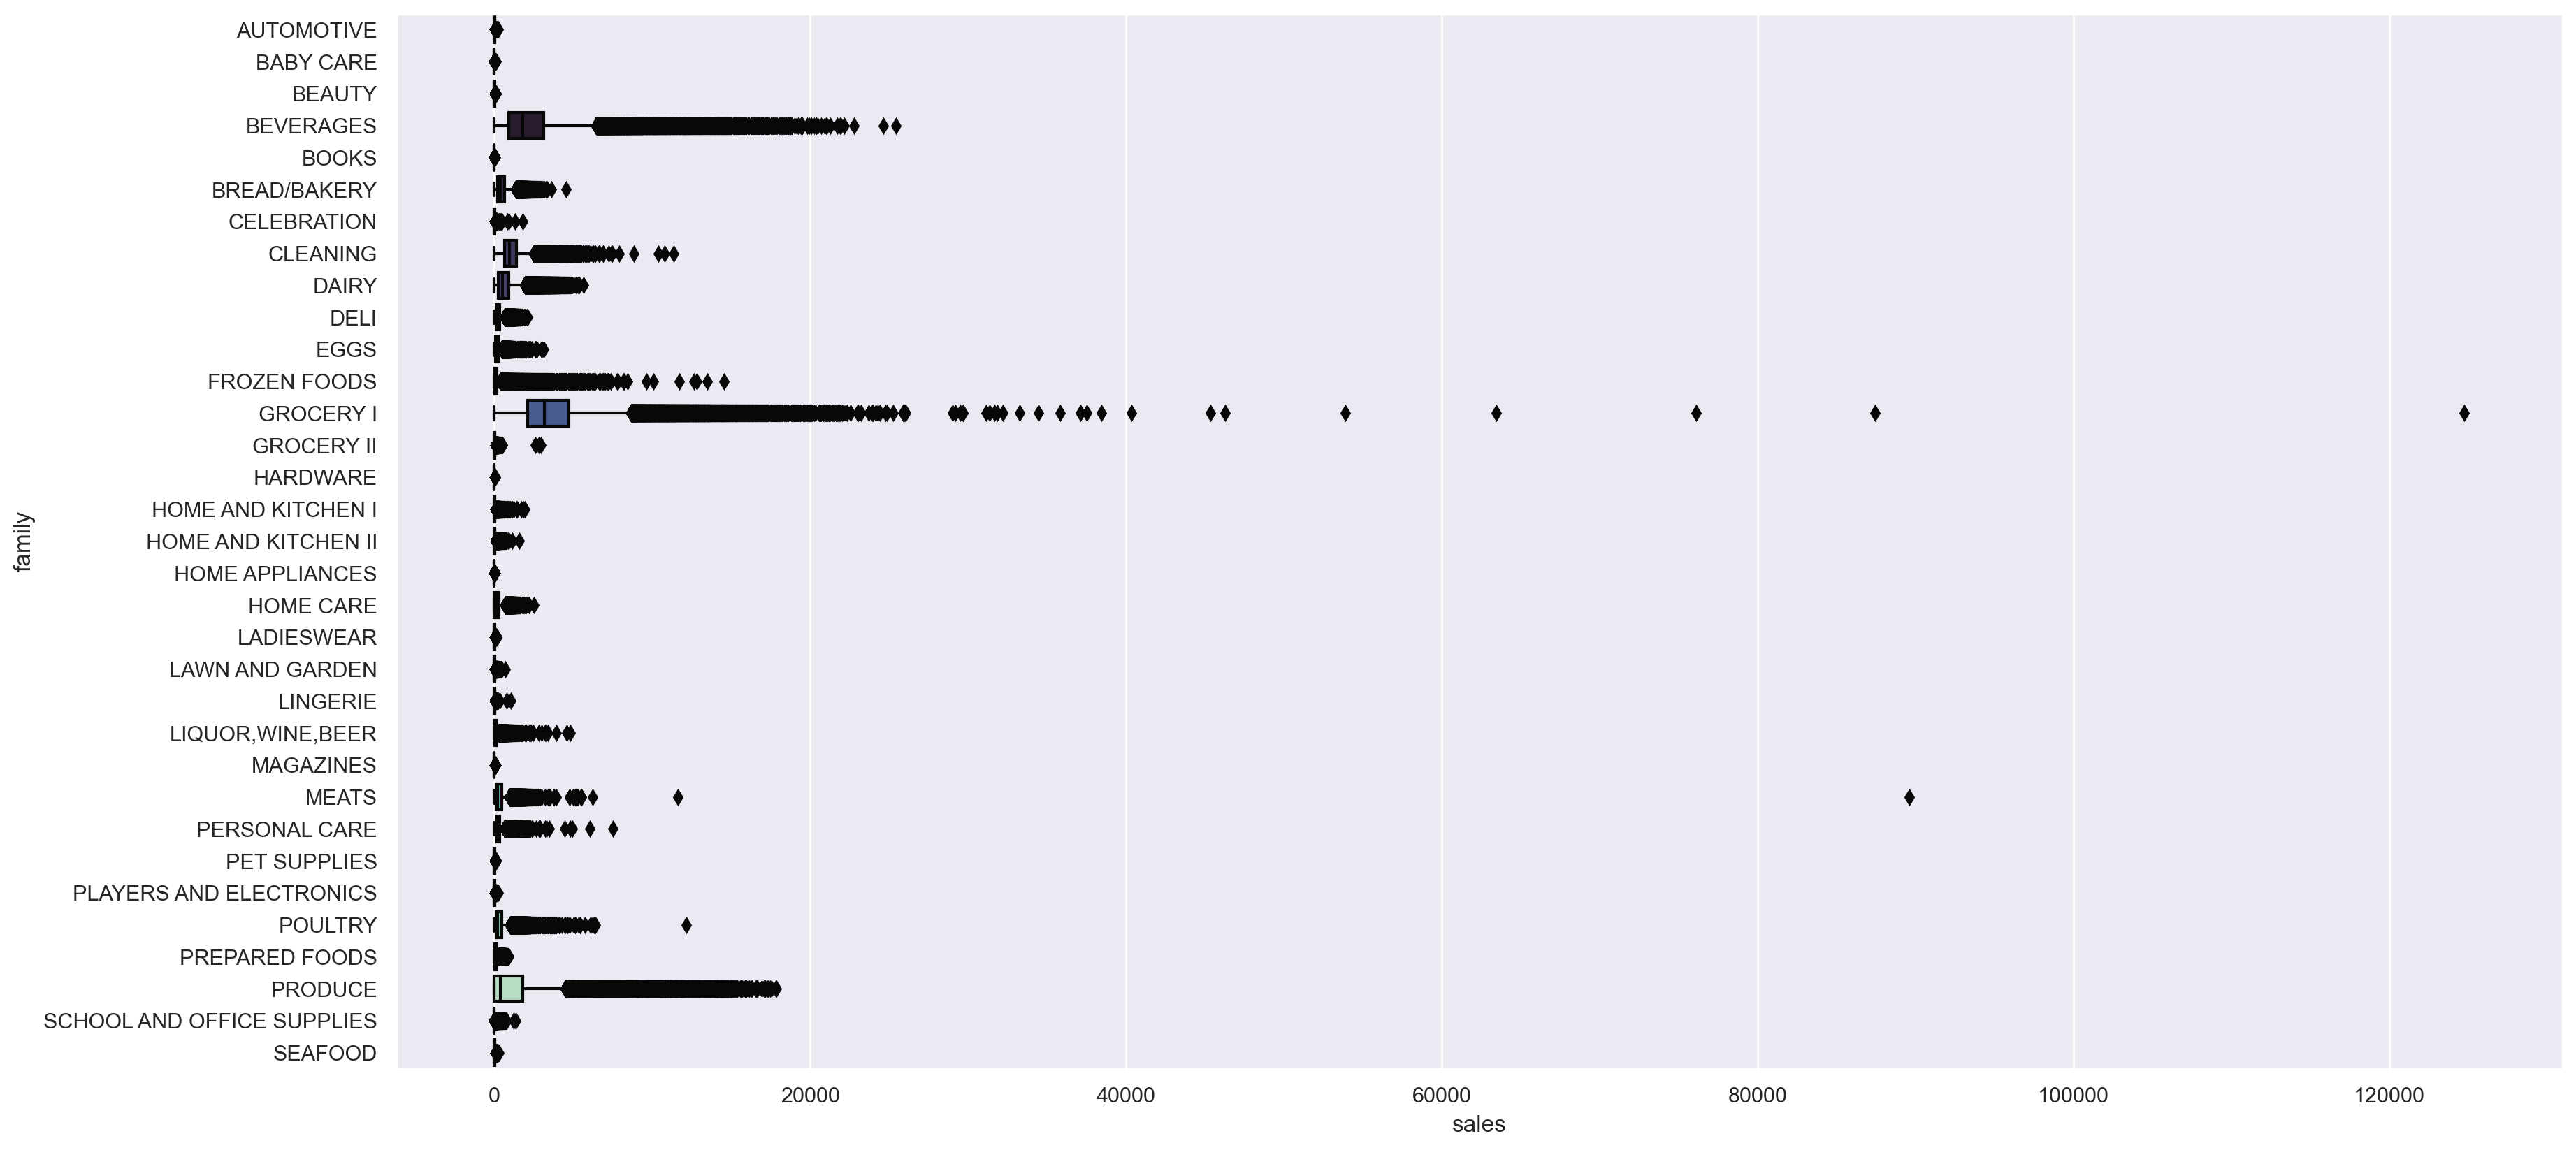

In [36]:
sns.set(rc = {'figure.figsize':(20,10), 'figure.dpi':(200)})
family_box = sns.boxplot(y='family',x='sales',data=train,palette='mako')

Las familias BEVERAGES, GROCERY I y PRODUCT tienen valores mucho ,más grandes, y distorsionan la info que el gráfico puede darnos de las demás.

[None]

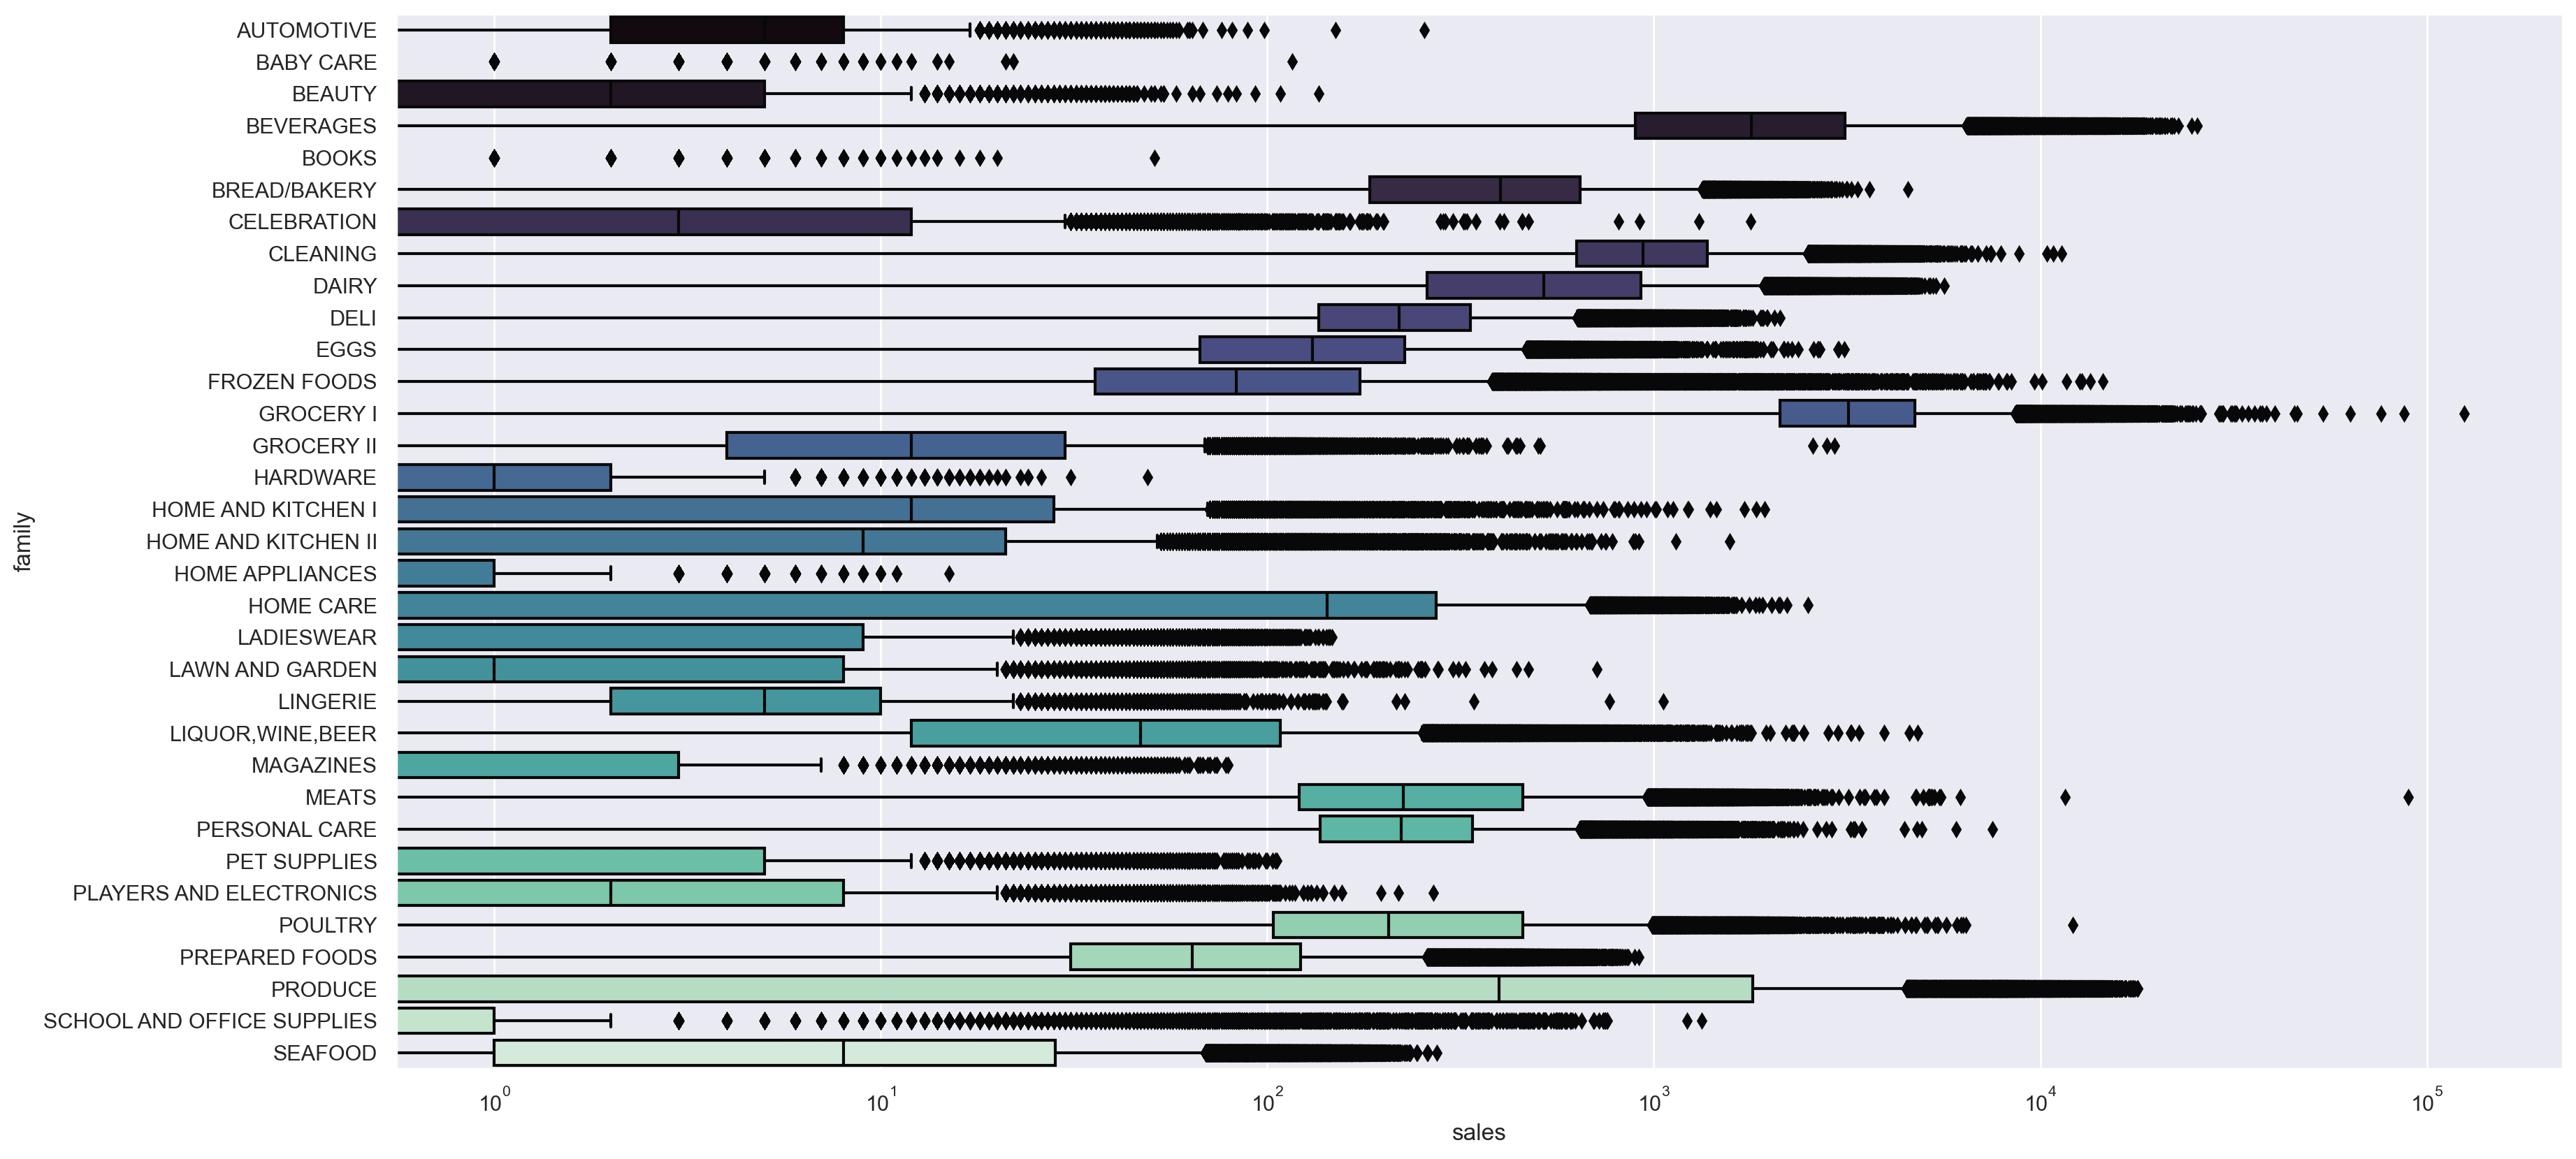

In [35]:
sns.set(rc = {'figure.figsize':(20,10), 'figure.dpi':(200)})
family_box = sns.boxplot(y='family',x='sales',data=train,palette='mako')
family_box.set(xscale="log")

Utilizar la escala logarítmica facilita la visualización. Cabe recordar que la unidad de medida en *sales* es cantidad de transacciones realizadas, y no un importe en moneda.

Para ver las ventas según sucursal, puedo usar el archivo *transactions.csv*. 

In [20]:
tx = pd.read_csv('E:/DESCARGAS/Archivo_de_apuntes_recursos_Coder_(no_borrar)/Data Science_Proyecto Final/store-sales-time-series-forecasting/transactions.csv')

In [21]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [22]:
tx['store_nbr'] = tx['store_nbr'].apply(str)

In [23]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  object
 2   transactions  83488 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [50]:
tx_sum = tx.groupby(by='store_nbr',as_index=False).sum().sort_values('transactions',ascending=False)

In [51]:
tx_sum.head()

,store_nbr,transactions
38,44,7273093
41,47,6535810
39,45,6201115
40,46,5990113
22,3,5366350


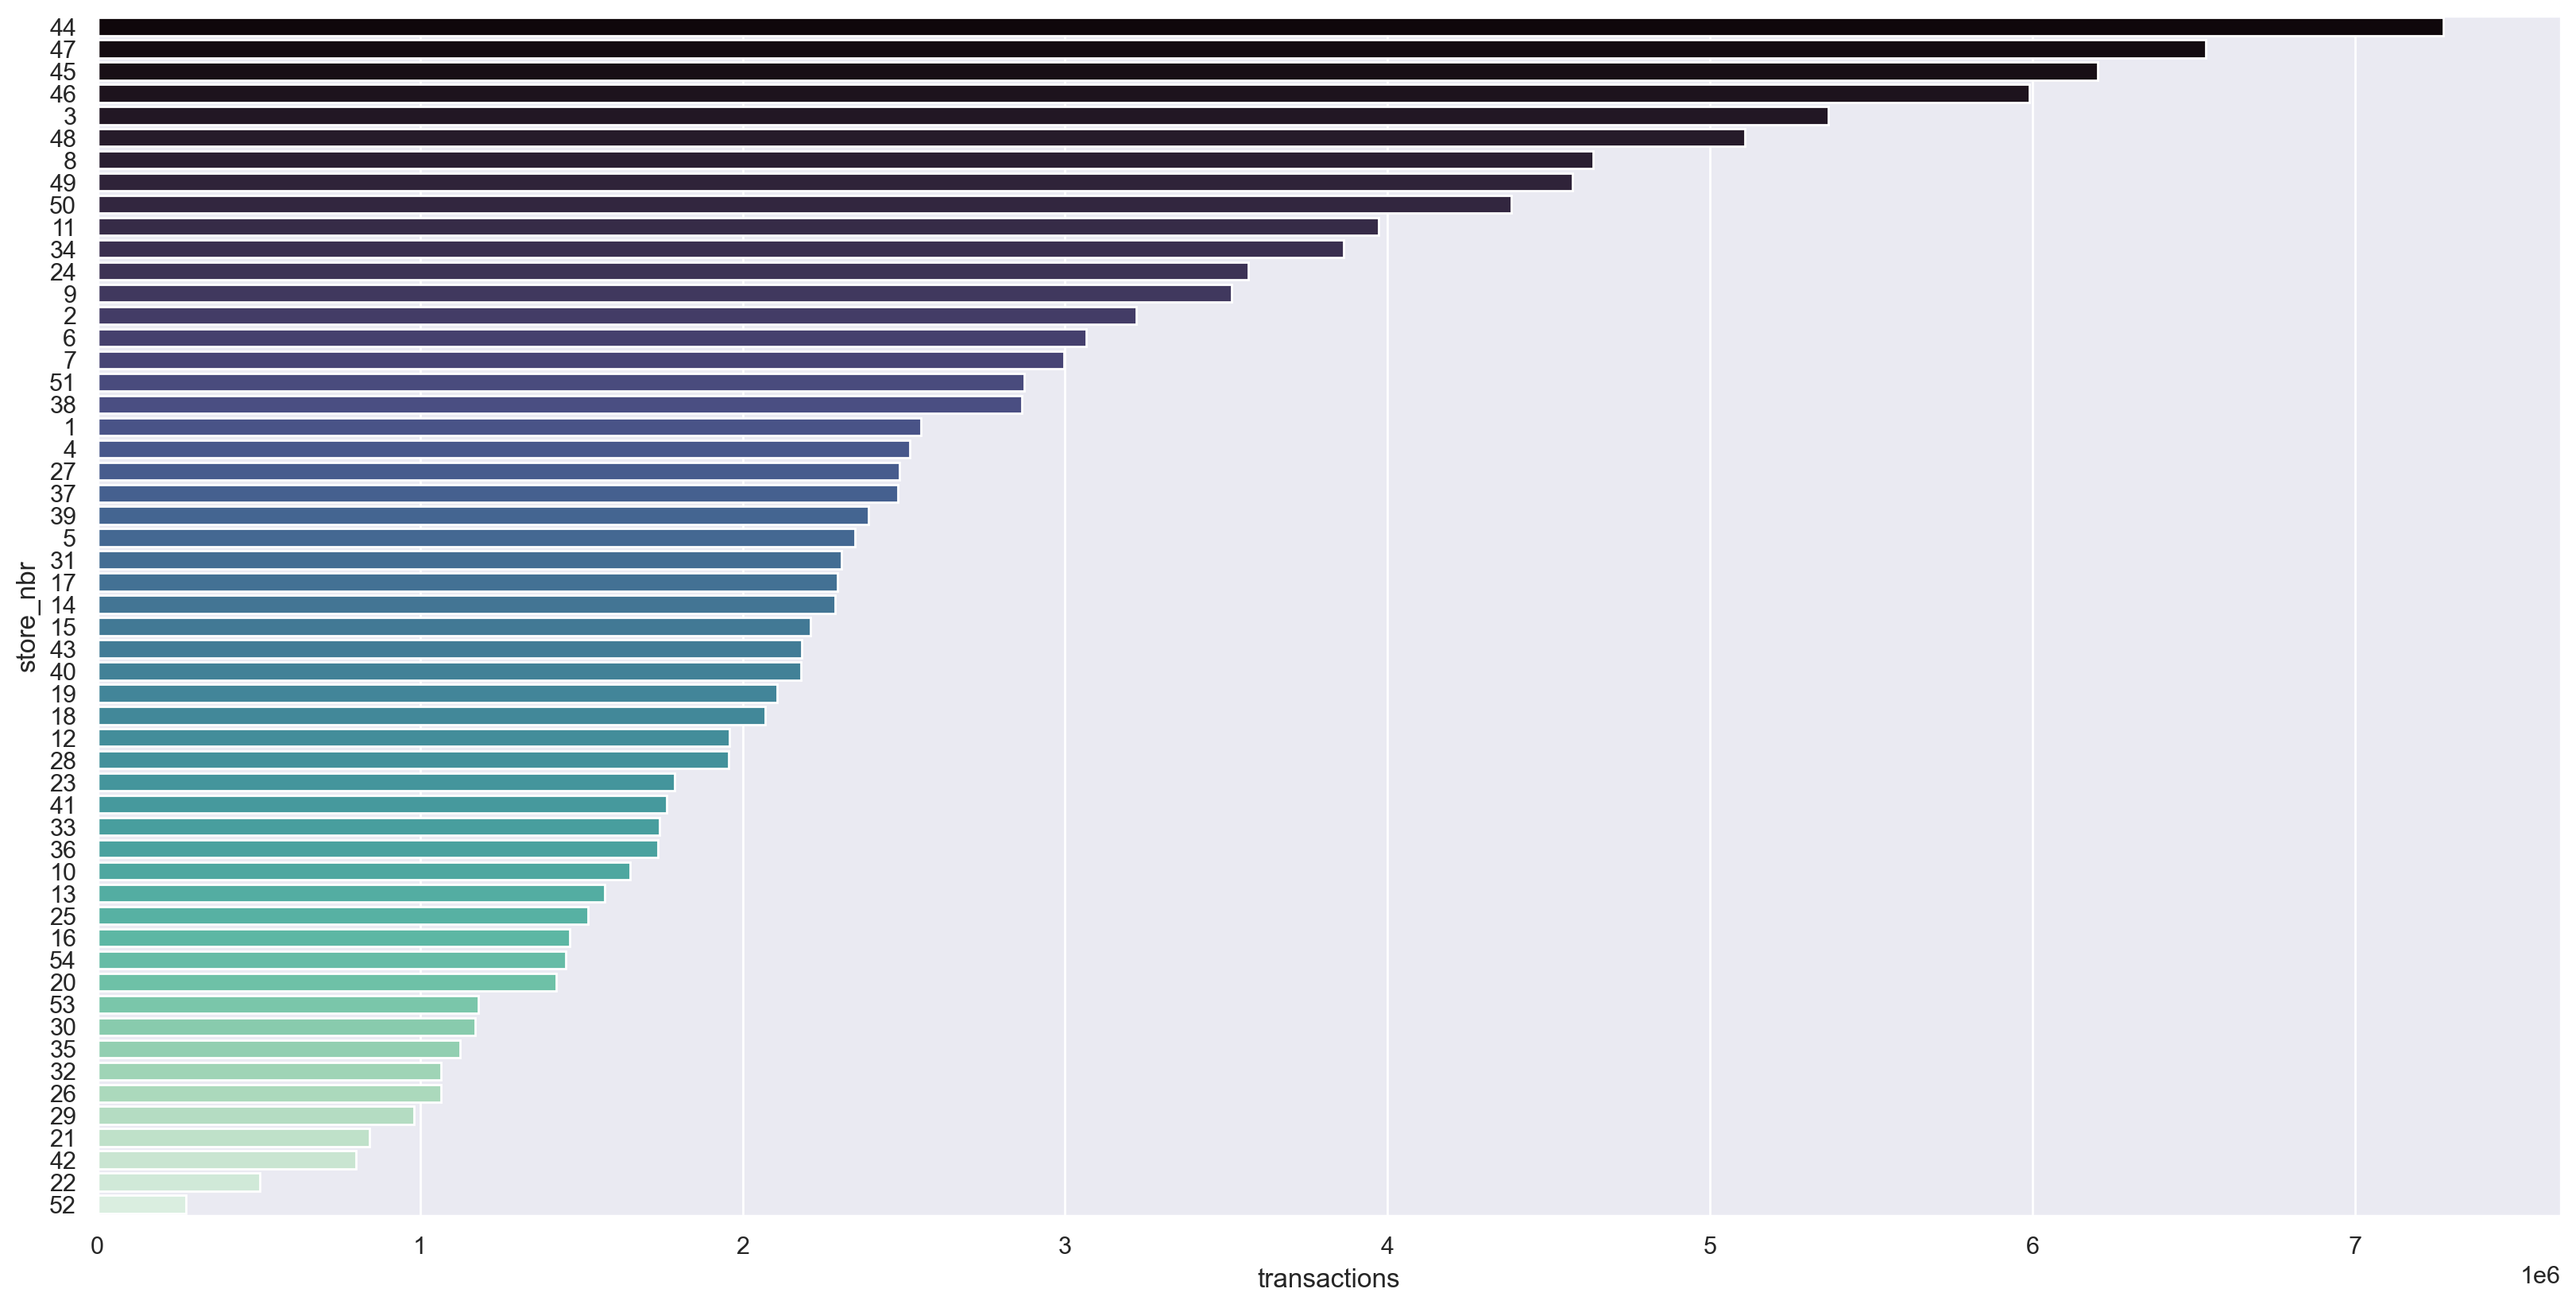

In [52]:
tx_sum_bar = sns.barplot(x='transactions',
                         y='store_nbr',
                         data=tx_sum,palette='mako',
                         )

## ¿Cómo se comporta el precio del crudo durante el período relevado?

In [58]:
oil = pd.read_csv('E:/DESCARGAS/Archivo_de_apuntes_recursos_Coder_(no_borrar)/Data Science_Proyecto Final/store-sales-time-series-forecasting/oil.csv')

In [59]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [60]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

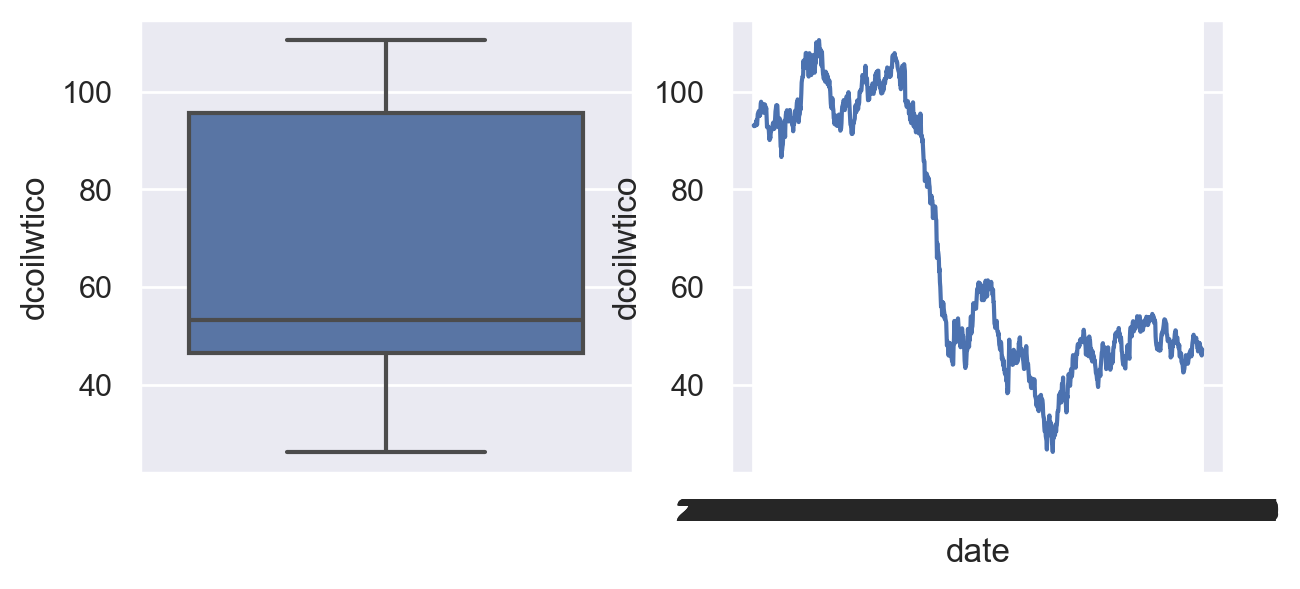

In [71]:
sns.set(rc = {'figure.figsize':(7,3), 'figure.dpi':(200)})
fig,ax = plt.subplots(1,2)
sns.boxplot(y='dcoilwtico',
           data=oil,
           ax=ax[0])
sns.lineplot(data=oil,
            x='date',
            y='dcoilwtico',
            ax=ax[1])

Para ver el comportamiento del precio del crudo, elegí utilizar tanto la función describe como gráficos.